# Detecting breast cancer

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Inputting

In [ ]:
names = ['id','thick','size','shape','marg','cell_size','bare',
         'chrom','normal','mit','class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' +
                 'breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                names=names,na_values='?',header=None)

df.head(6)

,id,thick,size,shape,marg,cell_size,bare,chrom,normal,mit,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4


In [5]:
x1 = df['size'].values
x2 = df['marg'].values

print(f"X1 shape: {x1.shape} | x2 shape: {x2.shape}")

X1 shape: (699,) | x2 shape: (699,)


In [7]:
# Check if each value in 'class' is equal to 4, and return a numpy array filled with 1s or 0s 
y = (df['class'].values == 4).astype(int)

In [9]:
print(x1[y == 1].shape) # x1 where y is 1
print(x1[y == 0].shape) # x1 where y is 0
print()
print(x2[y == 1].shape) # x2 where y is 1
print(x2[y == 0].shape) # x2 where y is 0

print(y.sum())

(241,)
(458,)

(241,)
(458,)
241


### Bad way of plotting

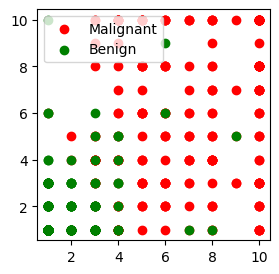

In [11]:
plt.figure(figsize=(3,3))
plt.scatter(x1[y == 1], x2[y == 1], color="red", label="Malignant")
plt.scatter(x1[y == 0], x2[y == 0], color="green", label="Benign")
plt.legend()
plt.show()

## Plotting Malignant vs Benign tumors

In [14]:

def plot_count(X, y):
    '''
    X - Table (numpy 2d array) of shape = (num_rows, 2 columns)
    y - Takes values 0 or 1 (numpy 1d array) of shape (num_rows, )
    returns - plt after plotting all points correctly
    '''
    xnames = ['size', 'marg']
    # Compute the bin edges for the 2d histogram
    x0val = np.array(list(set(X[:,0]))).astype(float)
    x1val = np.array(list(set(X[:,1]))).astype(float)
    x0, x1 = np.meshgrid(x0val,x1val)
    x0e= np.hstack((x0val,np.max(x0val)+1))
    x1e= np.hstack((x1val,np.max(x1val)+1))

    # Make a plot for each class
    yval = list(set(y))
    color = ['g','r']
    plt.figure(figsize=(8,6))
    for i in range(len(yval)):
        I = np.where(y==yval[i])[0]
        count, x0e, x1e = np.histogram2d(X[I,0],X[I,1],[x0e,x1e])
        x0, x1 = np.meshgrid(x0val,x1val)
        plt.scatter(x0.ravel(), x1.ravel(), s=2*count.ravel(),alpha=0.5,
                    c=color[i],edgecolors='none')
    plt.ylim([0,14])
    plt.legend(['benign','malign'], loc='upper right')
    plt.xlabel(xnames[0], fontsize=16)
    plt.ylabel(xnames[1], fontsize=16)
    return plt

(699, 2)


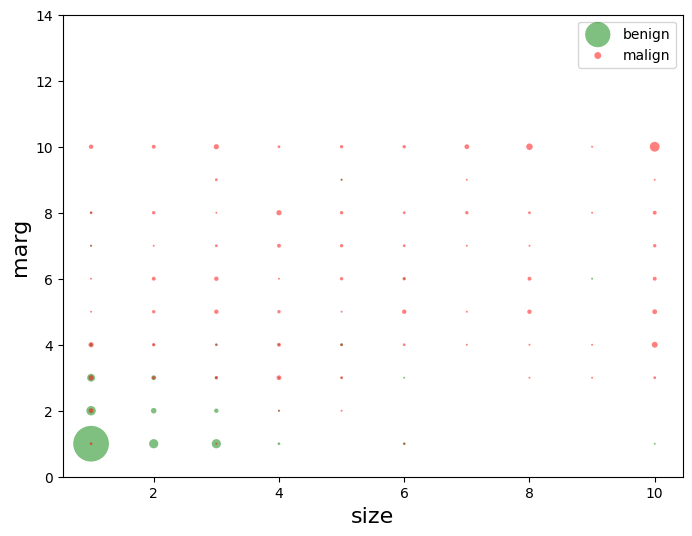

In [15]:
X = df[['size', 'marg']].values
print(X.shape)
plot_count(X, y)
plt.show()

## Classification:
### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

model = LogisticRegression()
model.fit(X, y)

y_hat = model.predict(X)
print(y_hat)

bce = log_loss(y, y_hat)
print(f"Binary cross entropy: {bce}")


### Function to print accuracy, sensitivity, precision, TP, TN, FP, FN

In [62]:
def metrics(y, y_hat):
    # TP, TN, FP, FN
    TP = np.sum(y+y_hat == 2) # y is 1 and y_hat is 1
    TN = np.sum(y+y_hat == 0) # Both are 0
    FP = np.sum((y == 0) & (y_hat == 1)) # predicted 1, actually 0
    FN = np.sum((y == 1) & (y_hat == 0)) # predicted 0, actually 1

    print(TP, TN, FP, FN)
    print(TP + TN + FP + FN)

metrics(y, y_hat)

203 445 13 38
699
